# Descripción del proyecto

El departamento analítico de Y.Afisha necesita ayuda para optimizar los gastos de marketing.

Se nos proporcionaron los registros del servidor con datos sobre las visitas a Y.Afisha desde enero 2017 hasta diciembre de 2018,
un archivo con los pedidos en este periodo, y las estadisticas de gastos de marketing.

Nuestros objetivos son:
* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.



### PREPARACION DE DATOS

#### IMPORTAR BIBLIOTECAS

In [1]:
#Sección para importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### CARGA DE DATAFRAMES

In [2]:
#. Descarga el dataset

visits=pd.read_csv('/datasets/visits_log_us.csv')

orders= pd.read_csv('/datasets/orders_log_us.csv')

costs=pd.read_csv('/datasets/costs_us.csv')

#### ANALISIS INICIAL VISITS

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

* Uid: identificador único del usuario;
* Device: dispositivo del usuario;
* Start Ts: fecha y hora de inicio de la sesión;
* End Ts: fecha y hora de término de la sesión;
* Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

In [4]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Como podemos observar no contamos con valores unicos en ninguna de las columnas, sin embargo, el tipo de datos debe cambiarse a formato de fecha en las columnas End Ts y Start Ts. Al mismo tiempo deberiamos reemplazar el nombre de las columnas a minusculas y reemplazar los espacios por "_". 

In [5]:
print(visits.columns)

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')


In [6]:
new_name_col=[] #se crea lista para almacenar los nuevos nombres
for old_name in visits.columns: #bucle para iterar sobre los nombres
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    name_no_spaces = name_lowered.replace(' ', '_')
    new_name_col.append(name_no_spaces)
visits.columns=new_name_col

In [7]:
print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [8]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")


In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [10]:
visits.duplicated().sum()

0

#### ANALISIS INICIAL ORDERS

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


La tabla orders (datos sobre pedidos):

* Uid: identificador único del usuario que realiza un pedido;
* Buy Ts: fecha y hora del pedido;
* Revenue: ingresos de Y.Afisha de este pedido.

In [12]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


En este dataframe contamos con el mismo problema, vamos a reemplazar el nombre de las columnas y cambiar el formato de buy_ts. Nuevamente no contamos con valores nulos.

In [13]:
#Se crea lista para almacenar los nuevos nombres
orders_new_name_col=[]

#Se crea bucle para iterar los nombres

for old_name in orders.columns:
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    name_no_spaces = name_lowered.replace(' ', '_')
    orders_new_name_col.append(name_no_spaces)
#Se reemplazan los nombres con la lista que contiene los nuevos
orders.columns=orders_new_name_col

In [14]:
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [15]:
#Se da formato de fecha a buy_ts
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
orders.duplicated().sum()

0

#### ANALISIS INICIAL COSTS

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


La tabla costs (datos sobre gastos de marketing):

* source_id: identificador de la fuente de anuncios
* dt: fecha;
* costs: gastos en esta fuente de anuncios en este día.

In [18]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [19]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [20]:
costs.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2537    False
2538    False
2539    False
2540    False
2541    False
Length: 2542, dtype: bool

En este dataframe solo transformaremos el formato fecha para la columna dt.

In [21]:
costs['dt']=pd.to_datetime(costs['dt'],format='%Y-%m-%d %H:%M:%S')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [22]:
costs.groupby('dt')['costs'].sum()

dt
2017-06-01     735.26
2017-06-02     721.19
2017-06-03     450.85
2017-06-04     761.16
2017-06-05     821.44
               ...   
2018-05-27     532.87
2018-05-28     619.44
2018-05-29     784.79
2018-05-30    1183.00
2018-05-31    2153.70
Name: costs, Length: 364, dtype: float64

In [23]:
costs.duplicated().sum()

0

#### ENRIQUECER DATOS

In [24]:
# Se agregan las columnas de año, mes, semana y día al dataframe visits, para poder analizar por grupos.
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
# Se agrega la columna de month para el correcto calculo de cohorte
visits["month"] = visits["start_ts"].dt.to_period("M").dt.start_time

In [25]:
# Agregamos nuevas columnas con el año, mes y semana a la tabla de costs.
costs['year']= costs['dt'].dt.year
costs['month']= costs['dt'].dt.month
costs["costs_month"] = costs['dt'].dt.to_period("M").dt.start_time
costs["day"] = costs['dt'].dt.to_period("D").dt.start_time

In [26]:
orders['orders_year']=orders['buy_ts'].dt.year
orders['orders_month']=orders['buy_ts'].dt.month
orders["day"] = orders['buy_ts'].dt.to_period("D").dt.start_time
orders["week"] = orders['buy_ts'].dt.to_period("W").dt.start_time
orders["month"] = orders['buy_ts'].dt.to_period("M").dt.start_time
orders['year'] = orders['buy_ts'].dt.to_period('Y').dt.start_time

In [27]:
#Revisamos cuantos datos disponemos
orders.groupby(['year','month']).count()

buy_ts  revenue   uid  orders_year  orders_month   day  \
year       month                                                                
2017-01-01 2017-06-01    2354     2354  2354         2354          2354  2354   
           2017-07-01    2363     2363  2363         2363          2363  2363   
           2017-08-01    1807     1807  1807         1807          1807  1807   
           2017-09-01    3387     3387  3387         3387          3387  3387   
           2017-10-01    5679     5679  5679         5679          5679  5679   
           2017-11-01    5659     5659  5659         5659          5659  5659   
           2017-12-01    6218     6218  6218         6218          6218  6218   
2018-01-01 2018-01-01    4721     4721  4721         4721          4721  4721   
           2018-02-01    5281     5281  5281         5281          5281  5281   
           2018-03-01    5326     5326  5326         5326          5326  5326   
           2018-04-01    3273     3273  3273         3273          3273  3273   
           2018-05-01    4346     4346  4346         4346          4346  4346   
           2018-06-01       1        1     1            1             1     1   

                       week  
year       month             
2017-01-01 2017-06-01  2354  
           2017-07-01  2363  
           2017-08-01  1807  
           2017-09-01  3387  
           2017-10-01  5679  
           2017-11-01  5659  
           2017-12-01  6218  
2018-01-01 2018-01-01  4721  
           2018-02-01  5281  
           2018-03-01  5326  
           2018-04-01  3273  
           2018-05-01  4346  
           2018-06-01     1

Encontramos que el mes de julio del 2018 solo tenemos un solo pedido asi que tomo la decision de excluirlo del analisis, en primer lugar para que todas las tablas estemos analizando la misma cantidad de meses, en segundo lugar no es representativo porlo cual se desprecia. 

In [28]:
#convertimos la fecha que deseamos excluir en formato de fecha y lo almacenamos en una variable
unico_pedido= pd.to_datetime('2018-06-01')
#creamos un filtro para excluir el pedido de julio y guardamos en el df orders
orders = orders[orders['day']<unico_pedido]

In [29]:
#Comprobamos que nuestro df
orders.groupby(['year','month']).count()

buy_ts  revenue   uid  orders_year  orders_month   day  \
year       month                                                                
2017-01-01 2017-06-01    2354     2354  2354         2354          2354  2354   
           2017-07-01    2363     2363  2363         2363          2363  2363   
           2017-08-01    1807     1807  1807         1807          1807  1807   
           2017-09-01    3387     3387  3387         3387          3387  3387   
           2017-10-01    5679     5679  5679         5679          5679  5679   
           2017-11-01    5659     5659  5659         5659          5659  5659   
           2017-12-01    6218     6218  6218         6218          6218  6218   
2018-01-01 2018-01-01    4721     4721  4721         4721          4721  4721   
           2018-02-01    5281     5281  5281         5281          5281  5281   
           2018-03-01    5326     5326  5326         5326          5326  5326   
           2018-04-01    3273     3273  3273         3273          3273  3273   
           2018-05-01    4346     4346  4346         4346          4346  4346   

                       week  
year       month             
2017-01-01 2017-06-01  2354  
           2017-07-01  2363  
           2017-08-01  1807  
           2017-09-01  3387  
           2017-10-01  5679  
           2017-11-01  5659  
           2017-12-01  6218  
2018-01-01 2018-01-01  4721  
           2018-02-01  5281  
           2018-03-01  5326  
           2018-04-01  3273  
           2018-05-01  4346

### CALCULO DE METRICAS

### VISITAS

#### ¿CUÁNTAS PERSONAS LO USAN CADA DÍA, SEMANA Y MES?

##### POR AÑO

                 uid
session_year        
2017          131777
2018          112535


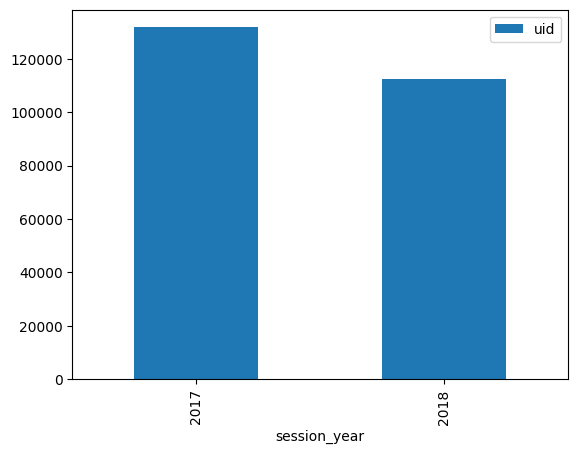

In [30]:
# Agrupamos por la columna año para contabilizar cuantas personas usaron Y.Afisha.
visits.groupby('session_year').agg({"uid":'nunique'})
visits.groupby('session_year').agg({"uid":'nunique'}).plot(kind='bar')

# imprimimos la tabla para conocer los valores
print(visits.groupby('session_year').agg({"uid":'nunique'}))

Obtuvimos que durante el año 2017 tuvimos 131,777 visitas y en el año 112,535, lo cual se podría traducir en una disminución del número de visitas, sin embargo, los datos del año 2017 pertenecen al segundo semestre del año y los datos del año 2018 pertenecen al primer semestre del año 2018, por lo cual podría generar un sesgo en nuestro ya que pueden existir eventos de temporada que afecten el comportamiento de visitas.

<AxesSubplot:xlabel='session_year,session_month'>

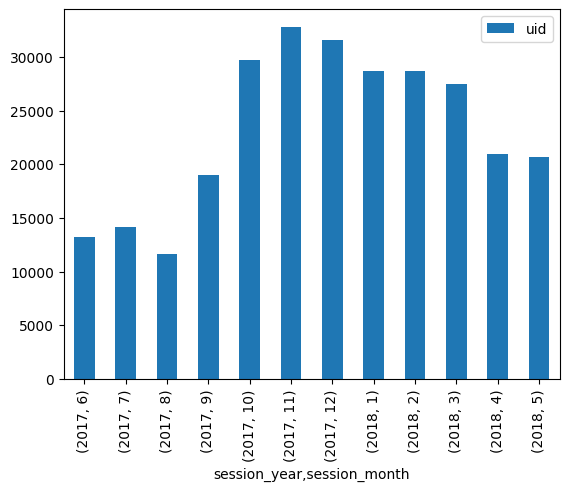

In [31]:
# agrupamos por mes
visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'})
visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).plot(kind='bar')

En este grafico por mes es mucho mas claro ver la comparacion y el comportamiento de visitas, si bien en el gráfico anterior parecia haber una disminución notable entre el año 2017 contra el año 2018, en la separación por mes, podemos observar que no es asi, si bien nos hacen falta los meses posteriores del 2018, conforme a la tendencia que lleva el año se podría esperar un mes 6 con mayor numero de visitas que el del año pasado. 

#### ¿CÚANTAS SESIONES HAY POR DÍA? 

In [32]:
visits_sessions_per_day = visits.groupby('session_date').agg({'uid':'nunique'})
visits_sessions_per_day.describe()


,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


In [33]:
visits_sessions_per_day.head()


,uid
session_date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


array([[<AxesSubplot:title={'center':'uid'}>]], dtype=object)

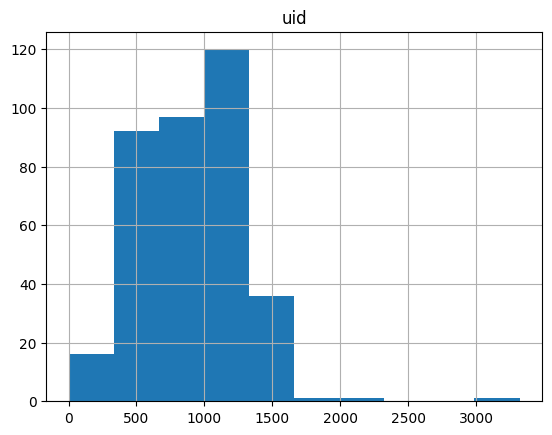

In [34]:
visits_sessions_per_day.hist()

In [35]:
avg_visits= visits_sessions_per_day.mean()
print(f'El mayor número de visitas en un día fue {visits_sessions_per_day.max().round(2)} usuarios por día')
print(f'El menor número de visitas en un día fue {visits_sessions_per_day.min().round(2)} usuarios por día')
print(f'El número promedio de visitas por día es de {avg_visits.mean().round(2)} usuarios por día')

El mayor número de visitas en un día fue uid    3319
dtype: int64 usuarios por día
El menor número de visitas en un día fue uid    1
dtype: int64 usuarios por día
El número promedio de visitas por día es de 907.99 usuarios por día


In [36]:
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,2017-11-01


##### POR MES

<AxesSubplot:xlabel='month'>

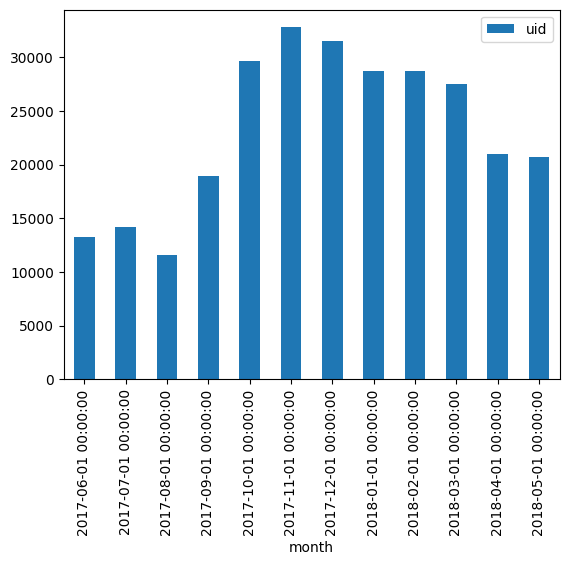

In [37]:
visits_sessions_per_day = visits.groupby('month').agg({'uid':'nunique'})
visits_sessions_per_day.plot(kind='bar')

Podemos observar la tendencia aumenta en los ultimos 3 meses del año y la tendencia en el número de visitas mantiene un crecimiento, por lo que podriamos esperar un incremento para los meses consecuentes del año.

##### POR DIA

<AxesSubplot:xlabel='session_date'>

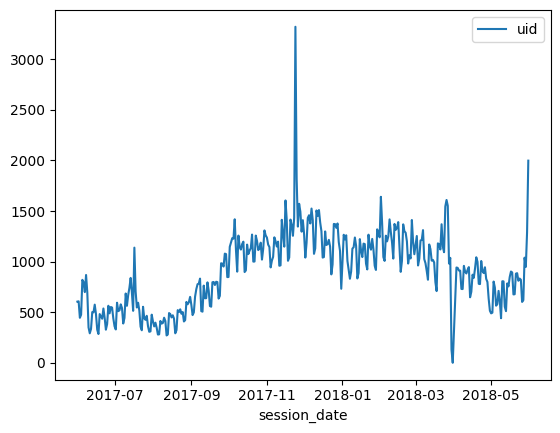

In [38]:
visits_sessions_per_day = visits.groupby('session_date').agg({'uid':'nunique'})
visits_sessions_per_day.plot(kind='line')

In [39]:
#Verificamos a que fecha pertenece el valor minimo
visits_sessions_per_day.query('uid == 1')


,uid
session_date,
2018-03-31,1


In [40]:
#Verificamos a que fecha pertenece el valor maximo
visits_sessions_per_day.query('uid == 3319')

,uid
session_date,
2017-11-24,3319


En este gráfico podemos observar el se muestra una tendencia en el incremento de visitas, sin embargo, tenemos un claro pico el 24 de noviembre del 2017, debemos analizar se tendrían que analizar los factores externos e internos que pudieron causar esta anomalia, por otro lado tenemos un minimo de una visita el dia 31 de marzo del 2018 (día de pascua) valdría la pena investigar si existe una relación entre las celebraciones y el número de visitas. 

####  ¿CUÁL ES LA DURACIÓN DE CADA SESIÓN?

In [41]:
# Se calcula la diferencia entre cada fecha de fin de sesion e inicio de sesion transformandola en segundo
# y se almacena en una nueva columna llamada session duration
visits['session_duration']= (visits['end_ts']-visits['start_ts']).dt.seconds
visits['session_duration'].describe(percentiles= [0.25,0.5,0.75,0.90,0.99])


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
90%        1620.000000
99%        4500.000000
max       84480.000000
Name: session_duration, dtype: float64

<AxesSubplot:>

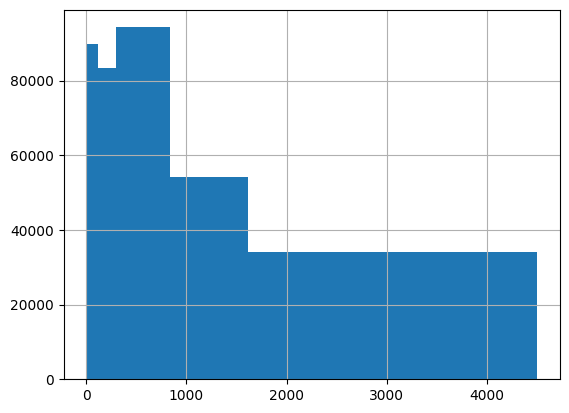

In [42]:
# Se crea un histograma agrupando en los diferentes percentiles en los que se encuentran los datos, 25%, 50%, 75% y 90%
# Se excluyen los valores arriba del 99%
visits.query('session_duration < 4500')['session_duration'].hist(bins=[0, 120, 300, 840, 1620,4500])

Como podemos observar en este gráfico las sesiones duran en promedio 10 min y el 75% de los usuarios tiene sesiones menores de 14 minutos.

#### ¿CON QUÉ FRECUENCIA LOS USUARIOS Y LAS USUARIAS REGRESAN?

In [43]:
first_visits = (
    visits
    .sort_values(by='start_ts')
    .groupby('uid')
    .head(1)
    .rename(columns={'month':'first_month',
                     "start_ts": "first_visit_at"})
)


first_visits.head()

,device,end_ts,source_id,first_visit_at,uid,session_year,session_month,session_week,session_date,first_month,session_duration
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017,6,22,2017-06-01,2017-06-01,60
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017,6,22,2017-06-01,2017-06-01,0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017,6,22,2017-06-01,2017-06-01,840
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017,6,22,2017-06-01,2017-06-01,0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01,120


In [44]:
first_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228169 entries, 308527 to 263781
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            228169 non-null  object        
 1   end_ts            228169 non-null  datetime64[ns]
 2   source_id         228169 non-null  int64         
 3   first_visit_at    228169 non-null  datetime64[ns]
 4   uid               228169 non-null  uint64        
 5   session_year      228169 non-null  int64         
 6   session_month     228169 non-null  int64         
 7   session_week      228169 non-null  int64         
 8   session_date      228169 non-null  object        
 9   first_month       228169 non-null  datetime64[ns]
 10  session_duration  228169 non-null  int64         
dtypes: datetime64[ns](3), int64(5), object(2), uint64(1)
memory usage: 20.9+ MB


In [45]:
# Se crea una tabla llamada visits_with_cohort uniendo visits con firt_visits
visits_with_cohort= pd.merge(
    visits,
    first_visits[['uid','first_month']],
    on='uid'
)
visits_with_cohort.head()


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,month,session_duration,first_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,2018-03-01,1680,2018-03-01


In [46]:
#Se calcula la edad de los meses
visits_with_cohort["month_age"] = visits_with_cohort["month"].dt.month - visits_with_cohort["first_month"].dt.month
visits_with_cohort["month_age"] += 12*(visits_with_cohort["month"].dt.year - visits_with_cohort["first_month"].dt.year)

#Se crea una tabla dinamica visits_retention

visits_retention = visits_with_cohort.pivot_table(
    index="first_month",
    columns="month_age",
    values="uid",
    aggfunc="nunique"
)

visits_retention.fillna('')


month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [47]:
#Creamos una copia de nuestra tabla visits_retention para convertir nuestro valor a porcentaje
visits_retention_rate = visits_retention.copy()

for col in visits_retention_rate.columns:
    visits_retention_rate[col] = visits_retention_rate[col] / visits_retention[0]
visits_retention_rate.fillna('')

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01,1.0,0.05708,0.025454,0.020093,,,,,,,,


<AxesSubplot:xlabel='month_age'>

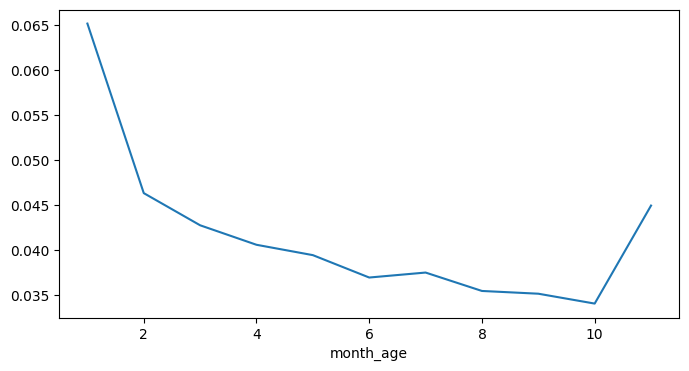

In [48]:
# Se crea gráfico de lineas para mostrar el comportamiento de retencion de los clientes
visits_retention_rate.iloc[:,1:].mean().plot(kind='line', figsize=(8, 4))

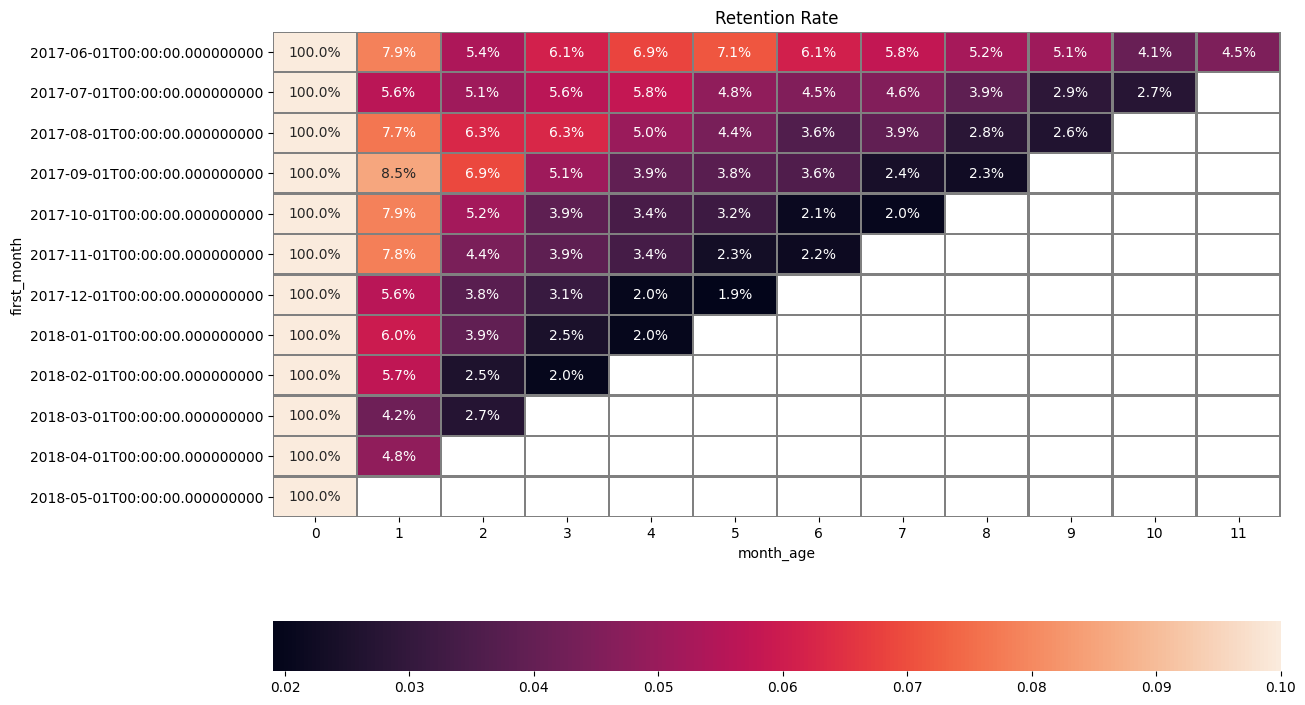

In [49]:
plt.figure(figsize=(13, 9))
sns.heatmap(visits_retention_rate, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

Podemos observar por medio de este grafico que nuestro porcentaje de retención de los clientes comienza a caer desde el segundo mes, este punto es importante para el departamento de marketing ya que se debe incentivar a los clientes que van a cumplir los dos meses para que realicen nuevamente una compra mediante cupones o descuentos y asi mejorar nuestro porcentaje de retención.

###	VENTAS

#### ¿CUANDO LA GENTE COMIENZA A COMPRAR?

In [50]:
#
first_orders = (
    orders
    .sort_values(by='buy_ts')
    .groupby('uid')
    .head(1)
    .rename(columns={'month':'first_order_month',
                    'buy_ts':'first_order_at'})
)


In [51]:
first_orders.head()

,first_order_at,revenue,uid,orders_year,orders_month,day,week,first_order_month,year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01


In [52]:
first_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36522 entries, 0 to 50413
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_at     36522 non-null  datetime64[ns]
 1   revenue            36522 non-null  float64       
 2   uid                36522 non-null  uint64        
 3   orders_year        36522 non-null  int64         
 4   orders_month       36522 non-null  int64         
 5   day                36522 non-null  datetime64[ns]
 6   week               36522 non-null  datetime64[ns]
 7   first_order_month  36522 non-null  datetime64[ns]
 8   year               36522 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(2), uint64(1)
memory usage: 2.8 MB


In [53]:
conversion_timestamps = pd.merge(
    first_orders[['uid','first_order_at','first_order_month']],
    first_visits[['uid','first_visit_at','first_month','source_id']]   
)
conversion_timestamps.head()

,uid,first_order_at,first_order_month,first_visit_at,first_month,source_id
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00,2017-06-01,1
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:31:00,2017-06-01,3


In [54]:

conversion_timestamps["time_to_order"] = conversion_timestamps["first_order_at"] - conversion_timestamps["first_visit_at"]
conversion_timestamps["time_to_order"] /= np.timedelta64(1, 'h')

conversion_timestamps.head(2)

,uid,first_order_at,first_order_month,first_visit_at,first_month,source_id,time_to_order
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00,2017-06-01,1,0.016667
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.183333


In [55]:
total_users = len(conversion_timestamps)

print(f"""
Conversion 0d: {(sum(conversion_timestamps['time_to_order'] < 24) / total_users)*100:.2f}%
Conversion 1d: {(sum(conversion_timestamps['time_to_order'] < 48) / total_users)*100:.2f}%
Conversion 2d: {(sum(conversion_timestamps['time_to_order'] < 72) / total_users)*100:.2f}%

Conversion 10d: {(sum(conversion_timestamps['time_to_order'] < 264) / total_users)*100:.2f}%
Conversion 100d: {(sum(conversion_timestamps['time_to_order'] < 2424) / total_users)*100:.2f}%
""")


Conversion 0d: 72.18%
Conversion 1d: 74.95%
Conversion 2d: 76.49%

Conversion 10d: 81.90%
Conversion 100d: 93.57%



Podemos concluir que el 75% de los usuarios tardan aproximadamente un día desde el momento en el que se registran hasta el momento en el que realizan la primera compra.

#### ¿CUÁNTOS PEDIDOS HACEN DURANTE UN PERÍODO DE TIEMPO DADO?

In [56]:
#Obtener el tamaño de los cohortes
o_cohort_sizes = (conversion_timestamps
                  .groupby('first_order_month')
                  .agg({'uid': 'nunique'})
                  .reset_index()
                  .rename(columns={'uid': 'cohort_size'})
)

In [57]:
#unir la tabla de orders con conversión_timestamps
o_cohorts = orders.merge(conversion_timestamps,
                        on='uid'
                        
)

In [58]:
#Se calcula el numero de compras que se realizaran en periodos posteriores a la primera compra
o_cohorts_grouped = o_cohorts.groupby(['first_order_month','month'])['orders_month'].count().reset_index()

In [59]:
#Calculamos la edad del cohorte
o_cohorts_grouped['month']= o_cohorts_grouped['month'].astype('datetime64[M]')
o_cohorts_grouped['first_order_month']= o_cohorts_grouped['first_order_month'].astype('datetime64[M]')

o_cohorts_grouped['age_month'] = o_cohorts_grouped['month'].dt.month - o_cohorts_grouped['first_order_month'].dt.month
o_cohorts_grouped['age_month'] += 12*(o_cohorts_grouped['month'].dt.year - o_cohorts_grouped['first_order_month'].dt.year)

In [60]:
#Se unen las tablas  o_cohorts_grouped y o_cohort_sizes
o_cohorts_grouped_sizes = o_cohorts_grouped.merge(
    o_cohort_sizes,
    on='first_order_month'
)


In [61]:
#Se crea la columna de compras por compradores
o_cohorts_grouped_sizes['orders_per_buyer']= o_cohorts_grouped_sizes['orders_month']/o_cohorts_grouped_sizes['cohort_size']


In [62]:
#Se crea tabla de doble entrada con la evolución de las compras por compradores
cohorts_ltv = o_cohorts_grouped_sizes.pivot_table(
index='first_order_month', 
columns='age_month', 
values='orders_per_buyer', 
aggfunc='sum'
).cumsum(axis=1)
cohorts_ltv.fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.83737,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.25117,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,
2017-08-01,1.118978,1.19781,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.59708,,
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,,,
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.31129,1.335023,1.354839,1.383641,,,,
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.42073,1.445724,,,,,
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,,,,,,
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,,,,,,,
2018-02-01,1.121611,1.182416,1.205149,1.224322,,,,,,,,


<AxesSubplot:title={'center':'Evolución de las compras por compradores'}, xlabel='age_month', ylabel='first_order_month'>

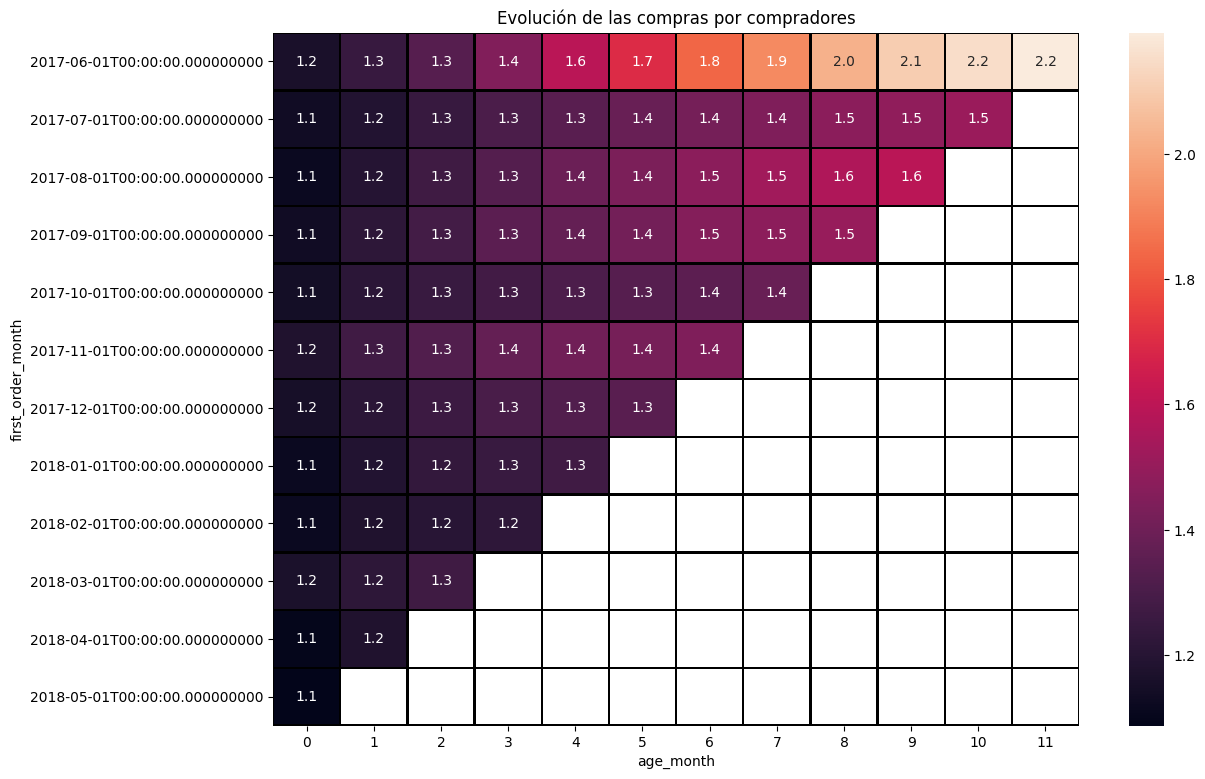

In [63]:
plt.figure(figsize=(13, 9))
plt.title('Evolución de las compras por compradores')
sns.heatmap(
    cohorts_ltv,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='black',
)

####  ¿CUÁL ES EL TAMAÑO PROMEDIO DE COMPRA?

In [64]:
#Agrupamos la ganancia por mes y por año.
mean_revenue_per_month = orders.groupby(['orders_year','orders_month'])['revenue'].mean().round(2)
#Mostramos la descripción de nuestra tabla
mean_revenue_per_month.describe()


count    12.000000
mean      4.956667
std       0.521629
min       4.060000
25%       4.777500
50%       4.890000
75%       5.335000
max       5.850000
Name: revenue, dtype: float64

Agrupamos por año y despues por mes, debido a que no contamos con los meses completos que conforman un año y debido a esto podriamos sacar conclusiones poco acertadas de la tendencia de nuestros datos. 

orders_year  orders_month
2017         6               4.06
             7               5.31
             8               4.85
             9               5.42
             10              4.93
             11              4.78
             12              5.85
2018         1               4.11
             2               4.84
             3               5.41
             4               5.15
             5               4.77
Name: revenue, dtype: float64


<AxesSubplot:xlabel='orders_year,orders_month'>

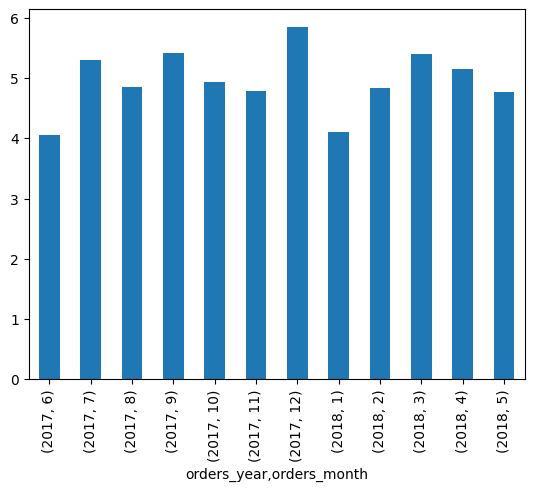

In [65]:
print(mean_revenue_per_month)
#Se crea grafico de barras del promedio de ganancias por mes/año
mean_revenue_per_month.plot(kind='bar')

En promedio los usuarios gastan 4.95 dolares en un pedido en un mes. podemos observar que en el grafico hay una tendencia de crecimiento en los meses de julio y en diciembre, donde se puede deber a las estaciones de año, verano e invierno respectivamente. 

In [66]:
mean_revenue_per_day = orders.groupby(['day'])['revenue'].mean().round(2)
mean_revenue_per_day.describe(percentiles= [0.25,0.50,0.75,0.90,0.99])

count    363.000000
mean       4.940413
std        2.022978
min        1.950000
25%        3.965000
50%        4.570000
75%        5.410000
90%        6.672000
99%       11.897000
max       29.130000
Name: revenue, dtype: float64

In [67]:
print(mean_revenue_per_day)

day
2017-06-01    4.06
2017-06-02    2.92
2017-06-03    2.48
2017-06-04    2.96
2017-06-05    2.74
              ... 
2018-05-27    3.50
2018-05-28    3.94
2018-05-29    2.60
2018-05-30    4.91
2018-05-31    7.56
Name: revenue, Length: 363, dtype: float64


In [68]:
print(f'En promedio un usuario genera un ingreso de {mean_revenue_per_day.mean().round(2)} dolares al día')

print(f'El mayor ingreso promedio por día fue de: {mean_revenue_per_day.max().round(2)} dolares')

print(f'El menor ingreso promedio por día fue de: {mean_revenue_per_day.min().round(2)} dolares')

En promedio un usuario genera un ingreso de 4.94 dolares al día
El mayor ingreso promedio por día fue de: 29.13 dolares
El menor ingreso promedio por día fue de: 1.95 dolares


#### ¿CUÁNTO DINERO TRAEN? (LTV)

In [69]:
first_visits_orders = pd.merge(
    first_orders,
    first_visits,
    on='uid'
)
#se agrega filtro para obtener valor por source_id
cohorts = (
    first_visits_orders
    .groupby(['source_id','first_order_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
    .rename(columns={'uid': 'cohort_size'})
)

In [70]:
#Se crea cohorts para analizar los cohorts en general
cohorts_all=(
    first_visits_orders
    .groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
    .rename(columns={'uid': 'cohort_size'})
)

In [71]:
cohorts.head()

,source_id,first_order_month,cohort_size
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340


Tomar la tabla de compras y juntar con las primeras órdenes para identificar el cohort al que pertenece cada usuario (identificando el primer mes en el que cada usuario hizo una compra): tenemos que tomar la tabla orders y juntarla con first_orders.

In [72]:
# Se identifica el cohort al que pertenece cada usuario, se junta la tabla orders y first_orders
orders_with_first_order = pd.merge(
    orders,
    first_orders[['uid', 'first_order_month']],
    on='uid'
)


In [73]:
# Se calcula la edad de los meses (se utiliza este método ya que el visto en clase quedo obsoleto en nuevas versiones de numpy)

orders_with_first_order["month_age"] = orders_with_first_order["month"].dt.month - orders_with_first_order["first_order_month"].dt.month
orders_with_first_order["month_age"] += 12*(orders_with_first_order["month"].dt.year - orders_with_first_order["first_order_month"].dt.year)

In [74]:
orders_with_first_order

,buy_ts,revenue,uid,orders_year,orders_month,day,week,month,year,first_order_month,month_age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2018,5,2018-05-31,2018-05-28,2018-05-01,2018-01-01,2018-05-01,0
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,2018-05-31,2018-05-28,2018-05-01,2018-01-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,2018-05-31,2018-05-28,2018-05-01,2018-01-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,2018-05-31,2018-05-28,2018-05-01,2018-01-01,2018-05-01,0


In [75]:
# Se crea la tabla average_revenue_table
average_revenue_table = orders_with_first_order.pivot_table(
    index='first_order_month',
    columns='month_age',
    values='revenue',
    aggfunc='sum'
).cumsum(axis=1)




In [76]:
# Se crea tabla por cohorts para todos los source
average_revenue_with_cohorts = pd.merge(
    average_revenue_table,
    cohorts,
    left_index=True,
    right_on='first_order_month'
)
#Se coloca como indice source_id y first_order_month
average_revenue_with_cohorts.set_index(['source_id','first_order_month'], inplace=True)
for col in average_revenue_with_cohorts.drop(columns='cohort_size').columns:
    average_revenue_with_cohorts[col] = average_revenue_with_cohorts[col] / average_revenue_with_cohorts['cohort_size']

In [77]:
# Se crea tabla por cohorts para todos los source
average_revenue_cohorts = pd.merge(
    average_revenue_table,
    cohorts_all,
    left_index=True,
    right_on='first_order_month'
)



In [78]:
average_revenue_cohorts.set_index('first_order_month', inplace=True)
for col in average_revenue_cohorts.drop(columns='cohort_size').columns:
    average_revenue_cohorts[col] = average_revenue_cohorts[col] / average_revenue_cohorts['cohort_size']

average_revenue_cohorts.fillna("")


,0,1,2,3,4,5,6,7,8,9,10,11,cohort_size
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234,2023
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,,1923
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,,1370
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,,2581
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,,4340
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,,4081
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,,4383
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,,3373
2018-02-01,4.156987,4.435262,4.513777,4.587921,,,,,,,,,3651


<AxesSubplot:title={'center':'LTV promedio por cliente'}, ylabel='first_order_month'>

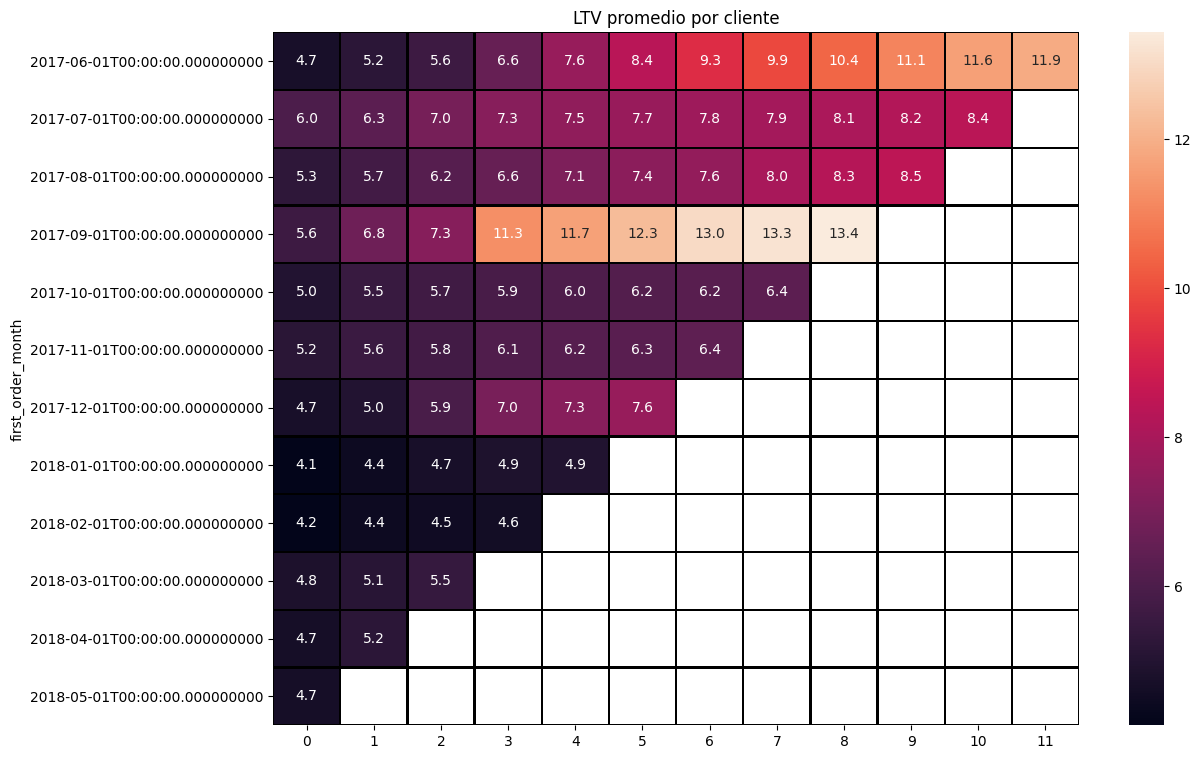

In [79]:
heatmap= average_revenue_cohorts.drop(columns='cohort_size')

plt.figure(figsize=(13, 9))
plt.title('LTV promedio por cliente')
sns.heatmap(
    heatmap,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='black',
)

In [80]:
# Se crea un diccionario para almacenar nuestros dataframes
dataframes_por_source_id = {}

# Iterar sobre los valores únicos de source_id
for source_id in average_revenue_with_cohorts.index.get_level_values('source_id').unique():
    # Filtra  por source_id usando el índice
    df_filtrado = average_revenue_with_cohorts.loc[source_id]
    
    # Se almacena el df filtrado en el diccionario
    dataframes_por_source_id[source_id] = df_filtrado

# Se muestran los DataFrames creados
for source_id, df_filtrado in dataframes_por_source_id.items():
    print(f'DataFrame para source_id {source_id}:')
    print(df_filtrado.fillna(''), end='\n\n')

DataFrame para source_id 1:
                           0          1          2          3           4  \
first_order_month                                                           
2017-06-01         50.302579  55.470053  60.129737  70.294474   81.181737   
2017-07-01         72.235312  76.264125  83.758187  88.072625   90.197437   
2017-08-01         63.971947  69.694336   75.25292  79.996726   85.986549   
2017-09-01         64.178546  76.885551  82.808546  128.01348  132.567841   
2017-10-01         63.871176  70.710029  73.153118  75.159029   77.093647   
2017-11-01         64.926728   69.95534  72.468889  76.561883   78.426204   
2017-12-01         62.741662  66.189456  78.439305  92.545347   96.689063   
2018-01-01         58.611345  62.788739  67.101092   69.12458   70.013151   
2018-02-01         55.189673  58.884145  59.926545  60.910909               
2018-03-01         60.838043  64.621139  68.588648                          
2018-04-01         59.221732  65.981061         

##### LTV PARA SOURCE 1

In [81]:
# se filtran solo los valores del source 1 mediante loc
df_filtrado_1 = average_revenue_with_cohorts.loc[1].drop(columns=['cohort_size'])
# Mostrar el DataFrame filtrado
df_filtrado_1.fillna("")

,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,50.302579,55.470053,60.129737,70.294474,81.181737,89.012895,99.132579,105.325,111.215263,117.665316,123.747737,126.482579
2017-07-01,72.235312,76.264125,83.758187,88.072625,90.197437,92.072937,93.517687,95.222187,97.16,98.9285,100.7995,
2017-08-01,63.971947,69.694336,75.25292,79.996726,85.986549,89.424159,91.97823,96.888496,100.431239,102.710265,,
2017-09-01,64.178546,76.885551,82.808546,128.01348,132.567841,139.925022,147.902335,150.66696,152.759119,,,
2017-10-01,63.871176,70.710029,73.153118,75.159029,77.093647,78.630029,79.712676,81.186618,,,,
2017-11-01,64.926728,69.95534,72.468889,76.561883,78.426204,79.104846,80.552438,,,,,
2017-12-01,62.741662,66.189456,78.439305,92.545347,96.689063,101.165378,,,,,,
2018-01-01,58.611345,62.788739,67.101092,69.12458,70.013151,,,,,,,
2018-02-01,55.189673,58.884145,59.926545,60.910909,,,,,,,,


<AxesSubplot:title={'center':'LTV para la fuente 1'}, ylabel='first_order_month'>

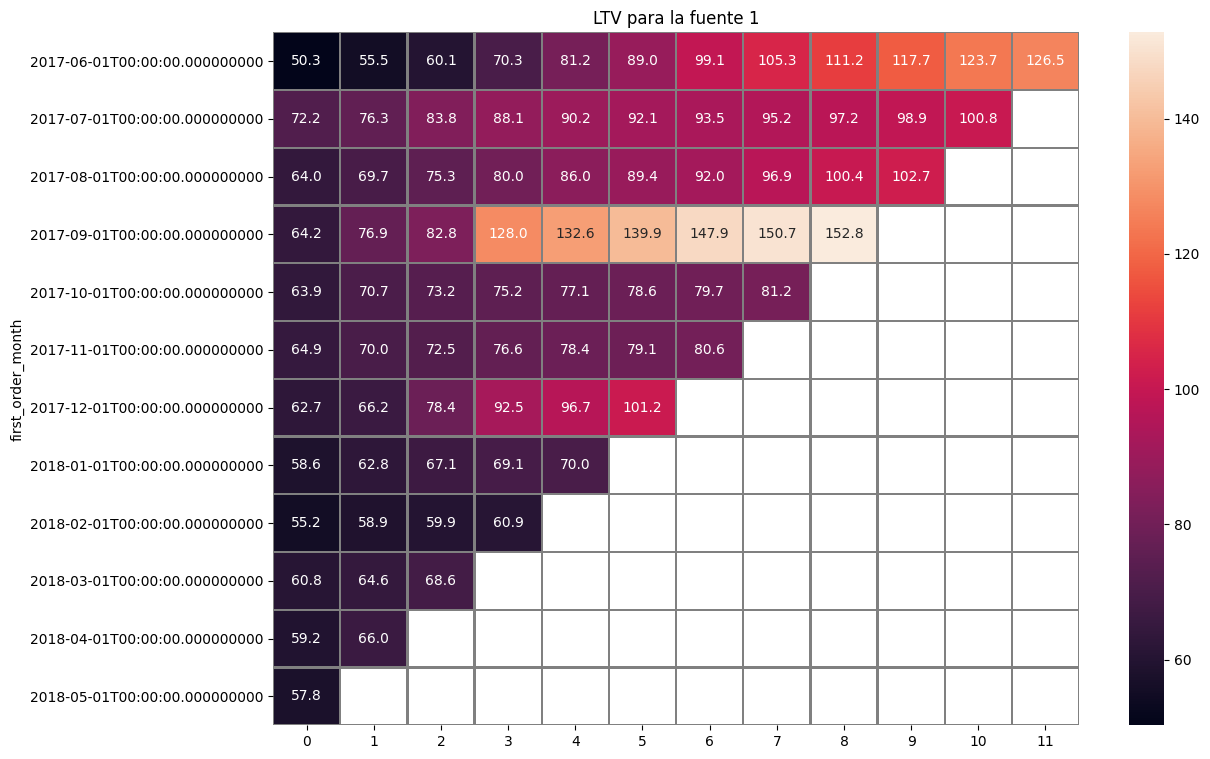

In [82]:
plt.figure(figsize=(13, 9))
plt.title('LTV para la fuente 1')
sns.heatmap(
    df_filtrado_1,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

In [83]:
ltv_1 = df_filtrado_1[11].mean().round(2)
print(f'En promedio un cliente aporta a la empresa alrededor de {ltv_1} dolares en un periodo de 12 meses')

En promedio un cliente aporta a la empresa alrededor de 126.48 dolares en un periodo de 12 meses


##### LTV PARA SOURCE 2

In [84]:
# se filtran solo los valores del source 2 mediante loc
df_filtrado_2 = average_revenue_with_cohorts.loc[2].drop(columns=['cohort_size'])
# Mostrar el DataFrame filtrado
df_filtrado_2.fillna("")

,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,40.670170,44.848128,48.615532,56.83383,65.636298,71.967872,80.149745,85.156383,89.918723,95.13366,100.051362,102.262511
2017-07-01,55.565625,58.664712,64.429375,67.748173,69.382644,70.825337,71.936683,73.247837,74.738462,76.098846,77.538077,
2017-08-01,58.770976,64.02813,69.134797,73.492927,78.995772,82.153902,84.500325,89.011382,92.266098,94.359837,,
2017-09-01,65.920950,78.972941,85.056742,131.488959,136.166968,143.723891,151.917783,154.757466,156.906425,,,
2017-10-01,54.838889,60.710631,62.808232,64.53048,66.191515,67.510631,68.440177,69.705682,,,,
2017-11-01,52.854925,56.948568,58.994774,62.326759,63.844447,64.39691,65.575352,,,,,
2017-12-01,54.507848,57.503176,68.145433,80.400289,84.00021,87.889081,,,,,,
2018-01-01,47.772260,51.177123,54.691986,56.341267,57.065514,,,,,,,
2018-02-01,51.799181,55.266689,56.245051,57.168942,,,,,,,,


<AxesSubplot:title={'center':'LTV para la fuente 2'}, ylabel='first_order_month'>

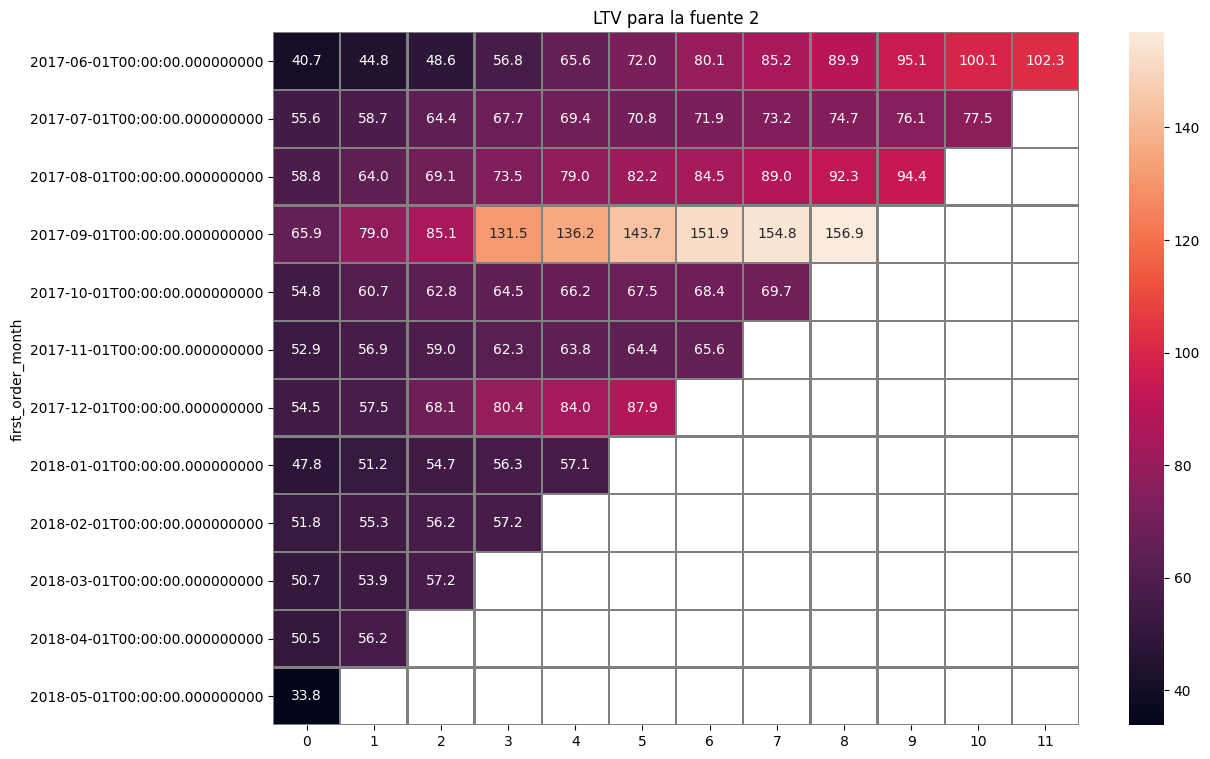

In [85]:
plt.figure(figsize=(13, 9))
plt.title('LTV para la fuente 2')
sns.heatmap(
    df_filtrado_2,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

In [86]:
ltv_2 = df_filtrado_2[11].mean().round(2)
print(f'En promedio un cliente aporta a la empresa alrededor de {ltv_2} dolares en un periodo de 12 meses')

En promedio un cliente aporta a la empresa alrededor de 102.26 dolares en un periodo de 12 meses


##### LTV PARA SOURCE 3

In [87]:
# se filtran solo los valores del source 3 mediante loc
df_filtrado_3 = average_revenue_with_cohorts.loc[3].drop(columns=['cohort_size'])
# Mostrar el DataFrame filtrado
df_filtrado_3.fillna("")

,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,14.980392,16.519295,17.906975,20.934091,24.176379,26.508542,29.522241,31.366379,33.120533,35.041395,36.852774,37.667226
2017-07-01,22.573535,23.832539,26.174434,27.522695,28.186699,28.772793,29.224277,29.756934,30.3625,30.915156,31.499844,
2017-08-01,21.450534,23.369318,25.233175,26.823828,28.832285,29.984955,30.841365,32.487834,33.675757,34.439941,,
2017-09-01,18.653688,22.347017,24.068553,37.207503,38.531242,40.669629,42.988259,43.791805,44.399898,,,
2017-10-01,18.850868,20.86928,21.59033,22.182352,22.753333,23.20678,23.526311,23.961328,,,,
2017-11-01,17.299556,18.639416,19.309145,20.399712,20.896456,21.077278,21.462985,,,,,
2017-12-01,15.768785,16.635315,19.714055,23.259309,24.300744,25.425771,,,,,,
2018-01-01,13.866302,14.854592,15.874811,16.353529,16.563748,,,,,,,
2018-02-01,13.898498,14.828883,15.091392,15.339286,,,,,,,,


In [88]:
#Calcular ltv por source_id:
ltv_3 = df_filtrado_3[11].mean().round(2)
print(f'En promedio un cliente aporta a la empresa alrededor de {ltv_3} dolares en un periodo de 12 meses')

En promedio un cliente aporta a la empresa alrededor de 37.67 dolares en un periodo de 12 meses


<AxesSubplot:title={'center':'LTV para la fuente 3'}, ylabel='first_order_month'>

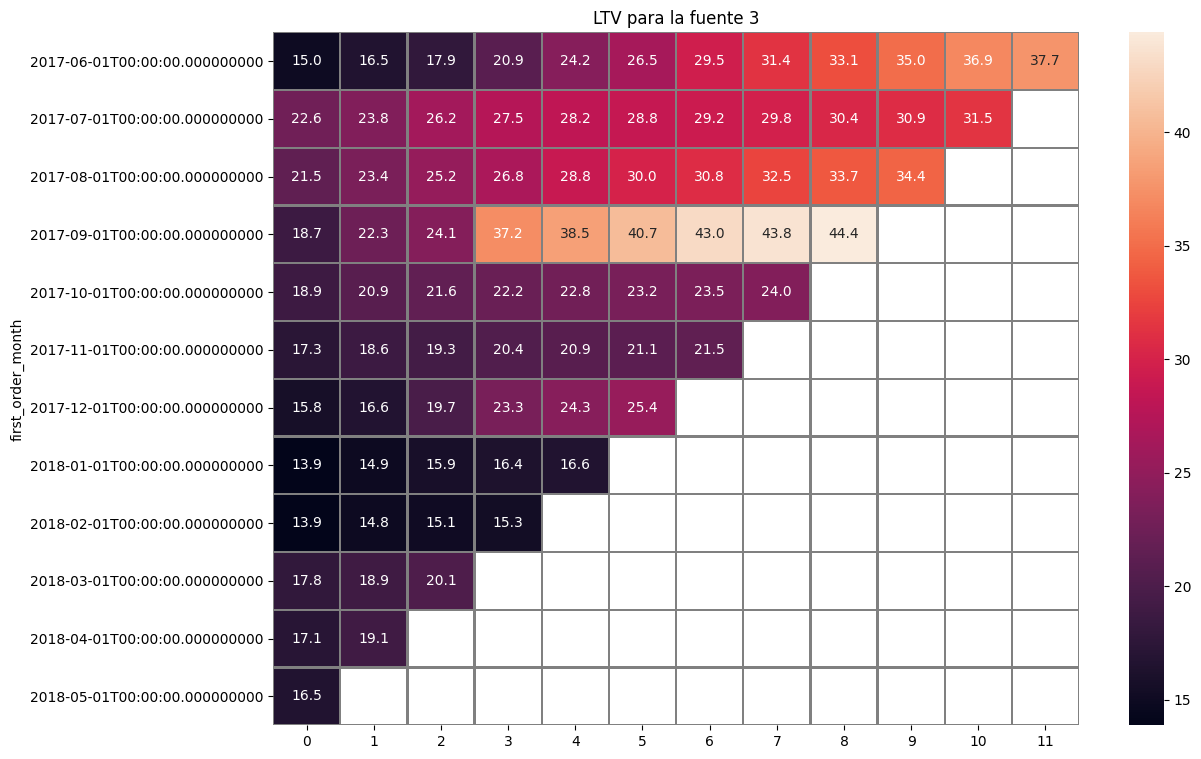

In [89]:
plt.figure(figsize=(13, 9))
plt.title('LTV para la fuente 3')
sns.heatmap(
    df_filtrado_3,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

##### LTV PARA SOURCE 4

In [90]:
# se filtran solo los valores del source 4 mediante loc
df_filtrado_4 = average_revenue_with_cohorts.loc[4].drop(columns=['cohort_size'])
# Mostrar el DataFrame filtrado
df_filtrado_4.fillna("")

,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,23.141622,25.51891,27.662591,32.338862,37.34753,40.950242,45.605787,48.4546,51.164407,54.131743,56.929952,58.188111
2017-07-01,22.355222,23.60205,25.921296,27.256518,27.914101,28.494526,28.941644,29.469149,30.068859,30.61617,31.195203,
2017-08-01,21.387071,23.300178,25.158521,26.744467,28.746982,29.896243,30.750118,32.391716,33.576124,34.338047,,
2017-09-01,24.692424,29.58139,31.860237,49.252644,51.004915,53.835559,56.904797,57.968475,58.773424,,,
2017-10-01,18.529181,20.513148,21.221894,21.803814,22.365051,22.810759,23.124838,23.552432,,,,
2017-11-01,17.872778,19.257035,19.948955,21.075658,21.588862,21.775675,22.174163,,,,,
2017-12-01,15.081692,15.910465,18.855054,22.245832,23.241888,24.317894,,,,,,
2018-01-01,13.516957,14.480349,15.474864,15.941521,16.146444,,,,,,,
2018-02-01,13.722568,14.641175,14.900362,15.145118,,,,,,,,


In [91]:
#Calcular ltv por source_id:
ltv_4 = df_filtrado_4[11].mean().round(2)
print(f'En promedio un cliente aporta a la empresa alrededor de {ltv_4} dolares en un periodo de 12 meses')

En promedio un cliente aporta a la empresa alrededor de 58.19 dolares en un periodo de 12 meses


<AxesSubplot:title={'center':'LTV para la fuente 4'}, ylabel='first_order_month'>

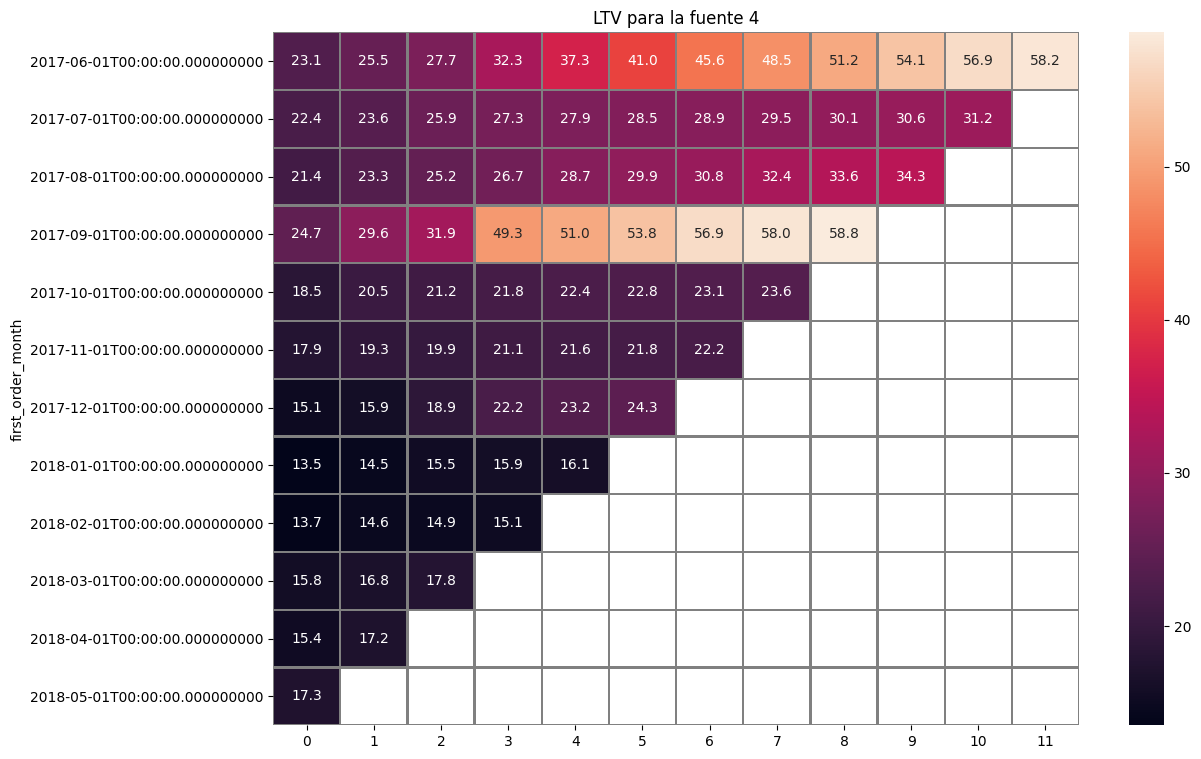

In [92]:
plt.figure(figsize=(13, 9))
plt.title('LTV para la fuente 4')
sns.heatmap(
    df_filtrado_4,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

##### LTV PARA SOURCE 5

In [93]:
# se filtran solo los valores del source 5 mediante loc
df_filtrado_5 = average_revenue_with_cohorts.loc[5].drop(columns=['cohort_size'])
# Mostrar el DataFrame filtrado
df_filtrado_5.fillna("")

,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,24.889297,27.44612,29.751693,34.78112,40.168047,44.042839,49.049974,52.113932,55.028385,58.219818,61.229349,62.582526
2017-07-01,27.323050,28.84695,31.681584,33.313522,34.117234,34.826643,35.373121,36.017849,36.750827,37.419764,38.12747,
2017-08-01,20.080083,21.876278,23.621056,25.110083,26.990222,28.06925,28.870944,30.412222,31.52425,32.239611,,
2017-09-01,24.734346,29.631613,31.914329,49.336265,51.091511,53.926961,57.001409,58.066893,58.873209,,,
2017-10-01,22.980106,25.440646,26.31964,27.041344,27.737397,28.290169,28.679693,29.21,,,,
2017-11-01,30.355354,32.706392,33.881558,35.795166,36.666797,36.984084,37.66088,,,,,
2017-12-01,26.935785,28.415966,33.674981,39.730882,41.509831,43.431569,,,,,,
2018-01-01,22.037125,23.607773,25.229163,25.989968,26.32406,,,,,,,
2018-02-01,22.385192,23.883687,24.30649,24.705752,,,,,,,,


In [94]:
#Calcular ltv por source_id:
ltv_5 = df_filtrado_5[11].mean().round(2)
print(f'En promedio un cliente aporta a la empresa alrededor de {ltv_5} dolares en un periodo de 12 meses')

En promedio un cliente aporta a la empresa alrededor de 62.58 dolares en un periodo de 12 meses


<AxesSubplot:title={'center':'LTV para la fuente 5'}, ylabel='first_order_month'>

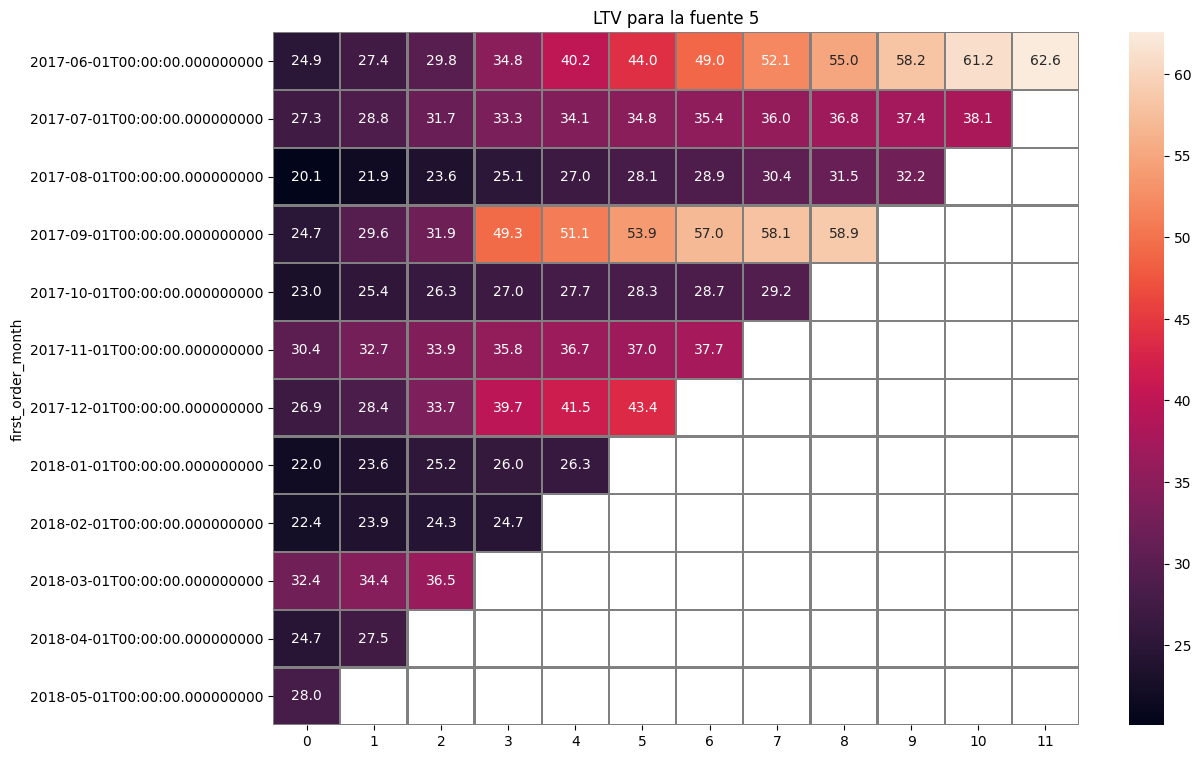

In [95]:
plt.figure(figsize=(13, 9))
plt.title('LTV para la fuente 5')
sns.heatmap(
    df_filtrado_5,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

##### LTV PARA SOURCE 9

In [96]:
# se filtran solo los valores del source 9 mediante loc
df_filtrado_9 = average_revenue_with_cohorts.loc[9].drop(columns=['cohort_size'])
# Mostrar el DataFrame filtrado
df_filtrado_9.fillna("")


,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,140.551324,154.989853,168.009559,196.411029,226.831324,248.7125,276.988088,294.290441,310.748529,328.770735,345.765735,353.407206
2017-07-01,222.262500,234.658846,257.7175,270.992692,277.530577,283.301346,287.746731,292.991346,298.953846,304.395385,310.152308,
2017-08-01,118.505410,129.105902,139.402951,148.190656,159.286557,165.65459,170.385902,179.481967,186.044754,190.266557,,
2017-09-01,167.454368,200.609425,216.063678,334.012184,345.895402,365.091724,385.906092,393.11954,398.578391,,,
2017-10-01,172.350794,190.804841,197.397302,202.810079,208.030476,212.17627,215.097698,219.075,,,,
2017-11-01,145.077655,156.314,161.930483,171.076207,175.242,176.758414,179.993034,,,,,
2017-12-01,171.632149,181.063719,214.573636,253.16124,264.496529,276.741653,,,,,,
2018-01-01,174.368750,186.7965,199.62575,205.645625,208.289125,,,,,,,
2018-02-01,180.680476,192.775476,196.188095,199.410714,,,,,,,,


In [97]:
#Calcular ltv por source_id:
ltv_9 = df_filtrado_9[11].mean().round(2)
print(f'En promedio un cliente aporta a la empresa alrededor de {ltv_9} dolares en un periodo de 12 meses')

En promedio un cliente aporta a la empresa alrededor de 353.41 dolares en un periodo de 12 meses


<AxesSubplot:title={'center':'LTV para la fuente 9'}, ylabel='first_order_month'>

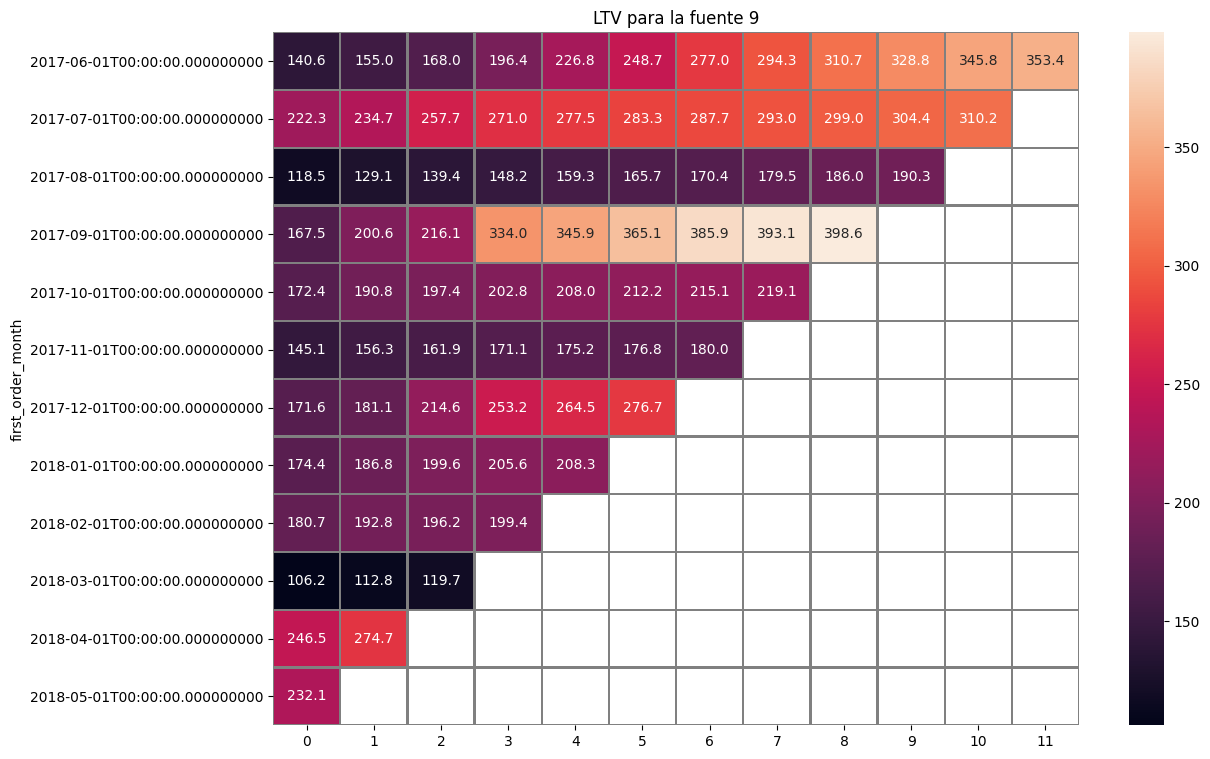

In [98]:
plt.figure(figsize=(13, 9))
plt.title('LTV para la fuente 9')
sns.heatmap(
    df_filtrado_9,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

##### LTV PARA SOURCE 10

In [99]:
# se filtran solo los valores del source 10 mediante loc
df_filtrado_10 = average_revenue_with_cohorts.loc[10].drop(columns=['cohort_size'])
# Mostrar el DataFrame filtrado
df_filtrado_10.fillna("")


,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,100.605158,110.940105,120.259474,140.588947,162.363474,178.025789,198.265158,210.65,222.430526,235.330632,247.495474,252.965158
2017-07-01,226.620588,239.26,262.770784,276.306275,282.972353,288.856275,293.388824,298.736275,304.815686,310.363922,316.233725,
2017-08-01,195.373784,212.85027,229.826486,244.314324,262.607568,273.106216,280.906486,295.902703,306.722432,313.682703,,
2017-09-01,169.401512,202.942093,218.576047,337.896047,349.917442,369.336977,390.393372,397.690698,403.213023,,,
2017-10-01,103.905263,115.03067,119.005072,122.268278,125.415502,127.91488,129.676124,132.073923,,,,
2017-11-01,164.345781,177.074453,183.436875,193.797266,198.516328,200.234141,203.898359,,,,,
2017-12-01,244.323412,257.749529,305.451882,360.382471,376.518588,393.949882,,,,,,
2018-01-01,151.625000,162.431739,173.587609,178.822283,181.120978,,,,,,,
2018-02-01,123.391545,131.651545,133.982114,136.182927,,,,,,,,


In [100]:
#Calcular ltv por source_id:
ltv_10 = df_filtrado_10[11].mean().round(2)
print(f'En promedio un cliente aporta a la empresa alrededor de {ltv_10} dolares en un periodo de 12 meses')

En promedio un cliente aporta a la empresa alrededor de 252.97 dolares en un periodo de 12 meses


<AxesSubplot:title={'center':'LTV para la fuente 10'}, ylabel='first_order_month'>

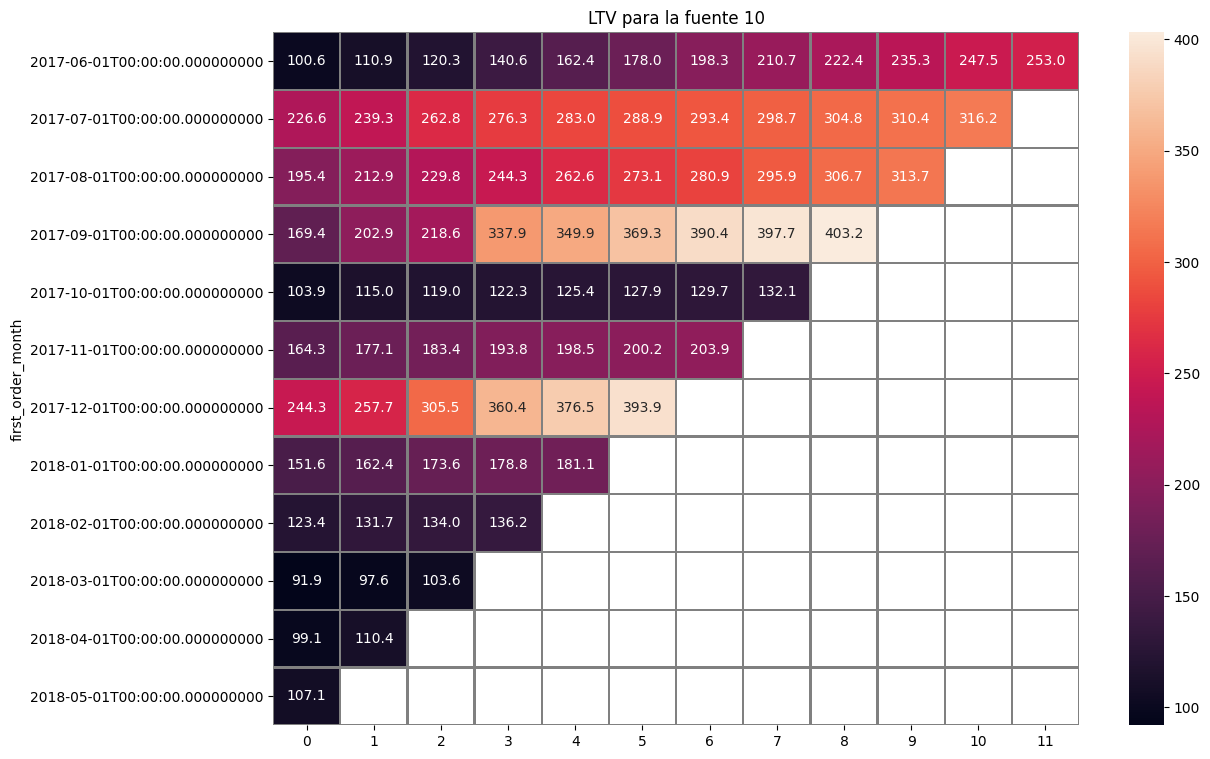

In [101]:
plt.figure(figsize=(13, 9))
plt.title('LTV para la fuente 10')
sns.heatmap(
    df_filtrado_10,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

In [102]:
# Se crea una lista con los source_id y los valores ltv por source_id
data = {
    'source_id': [1,2,3,4,5,9,10],
    'ltv': [ltv_1,ltv_2,ltv_3,ltv_4,ltv_5,ltv_9,ltv_10]
}
#Se crea un df
ltv = pd.DataFrame(data)
ltv

,source_id,ltv
0,1,126.48
1,2,102.26
2,3,37.67
3,4,58.19
4,5,62.58
5,9,353.41
6,10,252.97


In [103]:
ltv['ltv'].describe()

count      7.000000
mean     141.937143
std      117.647100
min       37.670000
25%       60.385000
50%      102.260000
75%      189.725000
max      353.410000
Name: ltv, dtype: float64

Con esto obtenemos el valor del ltv para cada source, la media obtenida por ltv fue de 141. 93, por otro lado, se obtuvo que la fuente 9 es la que mas aporta y la fuente 3 la que menos aporta, sin embargo, esta información aun falta compararla con el cac por fuente que calcularemos mas adelante. Asi sabremos que fuente es la mas rentable.

###	MARKETING:

#### ¿CUÁNTO DINERO SE GASTÓ?

In [104]:
print(f'El costo acumulado de Marketing es de:', costs['costs'].sum())


El costo acumulado de Marketing es de: 329131.62


##### POR FUENTE

<AxesSubplot:xlabel='source_id'>

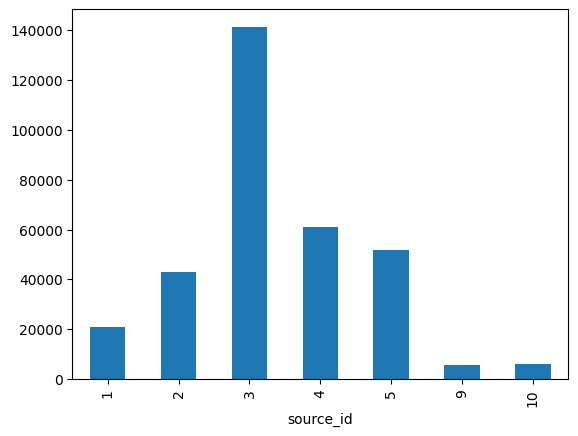

In [105]:
# Dinero gastado por fuente de adquisición.
costs.groupby('source_id')['costs'].sum().plot(kind='bar')

In [106]:
costs_by_source = costs.groupby('source_id')['costs'].sum()
costs_by_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [107]:
costs_by_source.describe()

count         7.000000
mean      47018.802857
std       46967.961870
min        5517.490000
25%       13327.880000
50%       42806.040000
75%       56415.350000
max      141321.630000
Name: costs, dtype: float64

In [108]:
print(f'La fuente que tuvo mayor costo de marketing fue la source 3 con {costs_by_source.max().round(2)}')
print(f'La fuente que tuvo menor costo de marketing fue la source 5 con {costs_by_source.min().round(2)}')
print(f'En promedio cada source tuvo un costo de marketing de {costs_by_source.mean().round(2)}')

La fuente que tuvo mayor costo de marketing fue la source 3 con 141321.63
La fuente que tuvo menor costo de marketing fue la source 5 con 5517.49
En promedio cada source tuvo un costo de marketing de 47018.8


##### POR MES

<AxesSubplot:title={'center':'Evolución del costo de marketing a través de los meses por año'}, xlabel='year,month'>

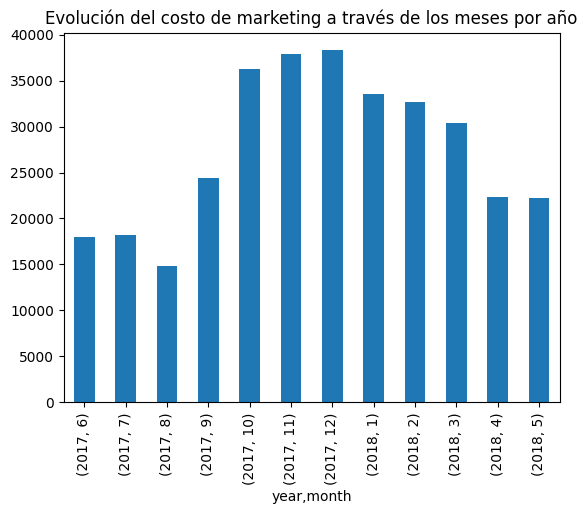

In [109]:
costs.groupby(['year','month'])['costs'].sum().plot(
    kind='bar',
    title='Evolución del costo de marketing a través de los meses por año'
)

Para esta tabla se decidio agrupar por año y mes, dado que contamos con el ultimo semestre de 2017 y el primer semestre del 2018, al solo agruparlo por mes, tendriamos determinar una tendencia incorrecta dado la naturaleza de los datos.

Por otro lado podemos observar que los gastos de marketing comienzan a incrementar en los meses de septiembre hasta diciembre, esto puede deberse a la inversión en publicidad de las festividades de los meses que comprende ese periodo.

#### ¿CUÁL FUE EL COSTO DE ADQUISICIÓN DE CLIENTES DE CADA UNA DE LAS FUENTES? (CAC)


##### POR MES

In [110]:
costs

,source_id,dt,costs,year,month,costs_month,day
0,1,2017-06-01,75.20,2017,6,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017,6,2017-06-01,2017-06-02
2,1,2017-06-03,36.53,2017,6,2017-06-01,2017-06-03
3,1,2017-06-04,55.00,2017,6,2017-06-01,2017-06-04
4,1,2017-06-05,57.08,2017,6,2017-06-01,2017-06-05
...,...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018,5,2018-05-01,2018-05-27
2538,10,2018-05-28,21.26,2018,5,2018-05-01,2018-05-28
2539,10,2018-05-29,11.32,2018,5,2018-05-01,2018-05-29
2540,10,2018-05-30,33.15,2018,5,2018-05-01,2018-05-30


In [111]:
monthly_cost=(
    costs
    .groupby(['costs_month','source_id'])['costs']
    .sum()
    .reset_index()
    .rename(columns={'costs_month':'month'})
)
monthly_cost.head(2)

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38


In [112]:
first_orders_with_source = pd.merge(
    first_orders,
    first_visits[["uid", "source_id"]],
    on="uid"
)

first_orders_with_source.head(2)

,first_order_at,revenue,uid,orders_year,orders_month,day,week,first_order_month,year,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,2017-06-01,2017-05-29,2017-06-01,2017-01-01,2


In [113]:
monthly_acquisition = (
    first_orders_with_source
    .groupby(['source_id', 'first_order_month'])["uid"]
    .nunique()
    .reset_index()
    .rename(columns={"uid": 'new_users',
                    "first_order_month":"month"})
)
monthly_acquisition

,source_id,month,new_users
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
80,10,2018-01-01,92
81,10,2018-02-01,123
82,10,2018-03-01,186
83,10,2018-04-01,107


In [114]:
monthly_cac = pd.merge(
    monthly_cost,
    monthly_acquisition,
    on=["month", "source_id"]
)
monthly_cac["cac"] = monthly_cac["costs"] / monthly_cac["new_users"]

cac_monthly = monthly_cac.groupby(['source_id','month'])["cac"].mean().reset_index()
cac_monthly

,source_id,month,cac
0,1,2017-06-01,5.924263
1,1,2017-07-01,6.705500
2,1,2017-08-01,8.423097
3,1,2017-09-01,6.616784
4,1,2017-10-01,6.811029
...,...,...,...
79,10,2018-01-01,6.677717
80,10,2018-02-01,3.909593
81,10,2018-03-01,2.830161
82,10,2018-04-01,3.628505


<AxesSubplot:xlabel='month'>

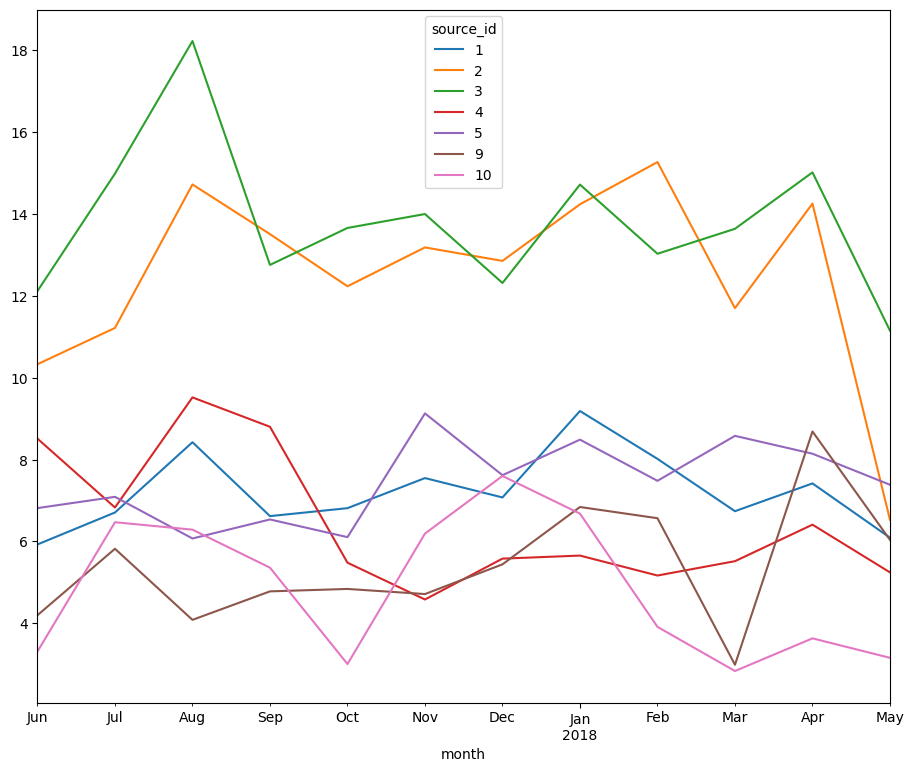

In [115]:

cac_monthly.pivot(index='month', columns='source_id',values='cac').plot(kind="line",figsize=(11, 9))


##### POR DIA

In [116]:
daily_costs = (
    costs
    .groupby(["day", "source_id"])["costs"]
    .sum()
    .reset_index()
)

daily_costs.head(2)

,day,source_id,costs
0,2017-06-01,1,75.20
1,2017-06-01,2,132.56


In [117]:
daily_acquisition = (
    first_orders_with_source
    .groupby(['source_id', 'day'])["uid"]
    .nunique()
    .reset_index()
    .rename(columns={"uid": 'new_users'})
)

daily_acquisition.head(2)

,source_id,day,new_users
0,1,2017-06-01,14
1,1,2017-06-02,7


In [118]:
daily_cac = pd.merge(
    daily_costs,
    daily_acquisition,
    on=["day", "source_id"]
)
daily_cac["cac"] = daily_cac["costs"] / daily_cac["new_users"]

cac_daily = daily_cac.groupby('source_id')["cac"].mean().reset_index()
cac_daily

,source_id,cac
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


<AxesSubplot:xlabel='source_id'>

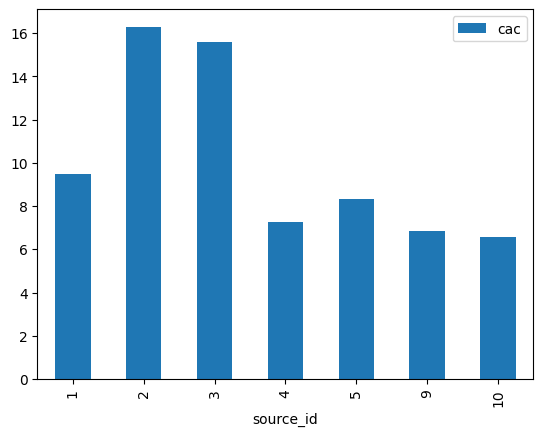

In [119]:
cac_daily.plot(kind='bar',x='source_id',y='cac')

Con esta tabla determinamos que la fuente 2 es en la que mas se invierte para adquirir un nuevo usuario, mientras que en la mas barata es la fuente 10.
A diferencia de la tabla del gasto por fuente en donde la fuente 3 era la que tenia el mayor gasto, sin embargo, se mantuvo aun por debajo de la fuente 2, concluyendo que apesar de ser la mas costosa, parece tener resultados en la captación de nuevos clientes. Adelante calcularemos la rentabilidad de cada fuente.

#### 	¿CUÁN RENTABLES ERAN LAS INVERSIONES? (ROMI)

In [121]:
daily_cac

,day,source_id,costs,new_users,cac
0,2017-06-01,1,75.20,14,5.371429
1,2017-06-01,2,132.56,11,12.050909
2,2017-06-01,3,349.38,33,10.587273
3,2017-06-01,4,76.74,10,7.674000
4,2017-06-01,5,73.24,13,5.633846
...,...,...,...,...,...
2428,2018-05-31,3,822.30,116,7.088793
2429,2018-05-31,4,492.54,82,6.006585
2430,2018-05-31,5,398.04,37,10.757838
2431,2018-05-31,9,27.37,5,5.474000


In [ ]:
report = cac.merge(
    ltv,
    on='source_id'
)
report['romi']= ((report['ltv']-report['cac'])/report['cac'])*100
report

In [ ]:
report['romi'].describe(percentiles= [0.25,0.5,0.75,0.90,0.95,0.99])

En conclusión calculando el romi por source_id obtenemos el verdadero rendimiento de cada fuente con respecto a lo que genero, contra lo que gasto obteniendo que:
* La fuente que mejor rendimiento presenta es la 9 con 5064.90
* La fuente con peor rendimiento fue la 3 con 141.77
Podemos concluir que aunque todos los romis de cada fuente es aceptable, podriamos usar esta información para replantear las estrategias de marketing que estamos usando para las fuentes que se encuentran por debajo de la media.

### CONCLUSIÓN

Aconsejaria invertir en la fuente 9 que es la que tiene mayor rendimiento, sin embargo, tambien valdria ver las opciones que se encuentran sobre la media como es la 10 y la 1 que tiene bajo costo para atraer a nuevos cliente (CAC)  y buenos ingresos por cliente (ltv).
En primera instancia con ltv, observamos cuales eran las que tenian mayores ingresos por cliente, lo cual nos daba un acercamiento a cuales eran las fuentes en las que deberiamos enfocarnos, pero hacia falta contrastar esa información con lo que costo cada una, asi que cuando obtuvimos el CAC nuevamente nos sirvio de ayuda para ver en que fuentes debiamos invertir más. Pero no fue hasta que se calculo el ROMI que obtuvimos el verdadero rendimiento de cada fuente.

En conclusión, trabajar con cohortes nos permite analizar de manera mas detallada la evolución de los clientes en diferentes grupos que comparten ciertas caracteristicas, acercandonos a un analisis mas acercado a la realidad, a diferencia de que si solo analizamos los valores brutos de cada metrica, los cuales nos arrojaban diferentes resultados de que fuente era la mas conveniente. 